In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import importlib

from divertor_spectroscopy import atomic_data
from divertor_spectroscopy import utilities as utils

from hebeam_analysis import crm_solver



Bad key "text.kerning_factor" on line 4 in
c:\Users\frhe\AppData\Local\anaconda3\envs\qss\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************

install grequests for python for parallel async download!


### How to use the atomic data interface

### Fractional abundances

### Line ratios
- I want to display the theoretical and real line ratios in a similar manner
- To make this super clear, here I start with synthetic optimal data
- Rules:
    - Density dependent line ratio on y axis and first cbar
    - Temperature dependent line ratio on x axis and second cbar

### Plot the idealized spectrum to explain the line ratio spectroscopy

\\share.ipp-hgw.mpg.de\documents\frhe\documents\phd\git\divertor_spectroscopy\divertor_spectroscopy\analysis.py:382: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.sqrt(ydata))


0.49999823640990476 0.6999989418368244


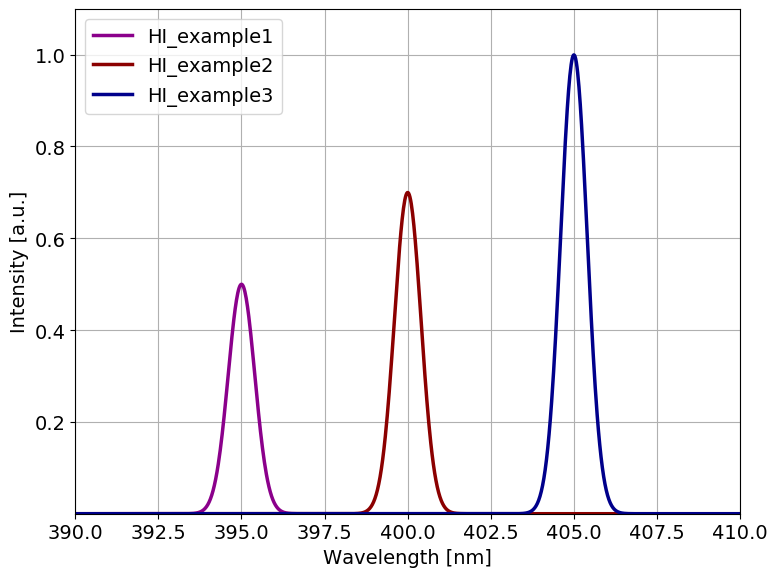

In [2]:
from divertor_spectroscopy.spectrum_models import synthetic_spectrum
from divertor_spectroscopy import instrument
from divertor_spectroscopy import analysis
importlib.reload(synthetic_spectrum)

model = synthetic_spectrum.Synthetic_spectrum()
wavelength = np.linspace(390,410,1024)
inst = instrument.Instrument(wavelength=wavelength,width=1/np.sqrt(2*np.pi))
analyse = analysis.Analysis(model=model,instrument=inst)

analyse.get_default_fit_parameters()
experiment_data = analyse.build_spectrum(wavelength,*analyse.default_fit_parameters)
analyse.fit_spectrum(experiment_data=experiment_data)
special_tags = ["HI_example1","HI_example2","HI_example3"]
analyse.format_fit_output()
analyse.fit_output
ne_ratio = analyse.fit_parameters_linear[0]/analyse.fit_parameters_linear[2]
Te_ratio = analyse.fit_parameters_linear[1]/analyse.fit_parameters_linear[2]
print(ne_ratio,Te_ratio)
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/synthetic_spectrum_for_contourplot"
analyse.display_spectrum(special_tags=special_tags,highlight_tags=model.all_tags,background_guess=False,fit=False,experiment=False,guess=False,save_path=save_path)




[[71, 5.55e+19]]


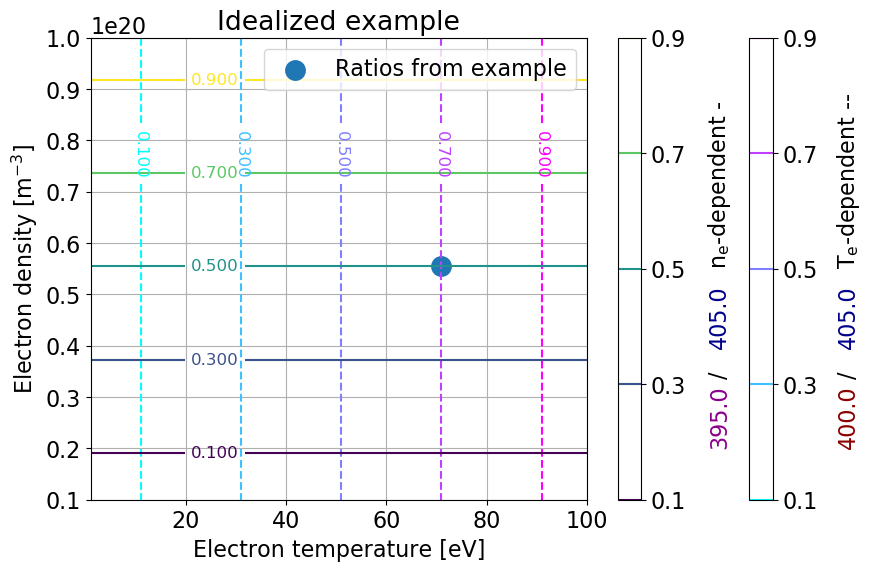

In [3]:
importlib.reload(atomic_data)
title = "Idealized example"
use_fractional_abundance = False
use_recom = False
ne_range = [1e19,1e20]
Te_range = [1,100]
ne_scale = "linear"
#ne_scale = "log"
comment=None
debug = True
add_points = [[71,5.55e19]]
print(add_points)
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/contour_plot_synthetic"
atomic_data.get_line_intensities(element="synthetic", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,add_points=add_points,save_path=save_path)

#### He beam
- the He beam only is used in an active manner, so this only requires the excitation PECs
- the He beam is sort of a special case. I am using Erik Floms code to get the line ratios and dependencies
    - there are two differnet PECs, which are both saved in a weird format
    - there is a megnetic field correction
    - Erik solves this in a possibly more stable way than I do, so I might want to learn from his code here also for my later applications

In [4]:
importlib.reload(atomic_data)
title = "Exc. only"
use_fractional_abundance = False
use_recom = False
ne_range = [5e18,1e20]
Te_range = [1,150]
ne_scale = "linear"
#ne_scale = "log"
comment=None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_helium_active_"+ne_scale
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="he", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


### Neon

#### Active

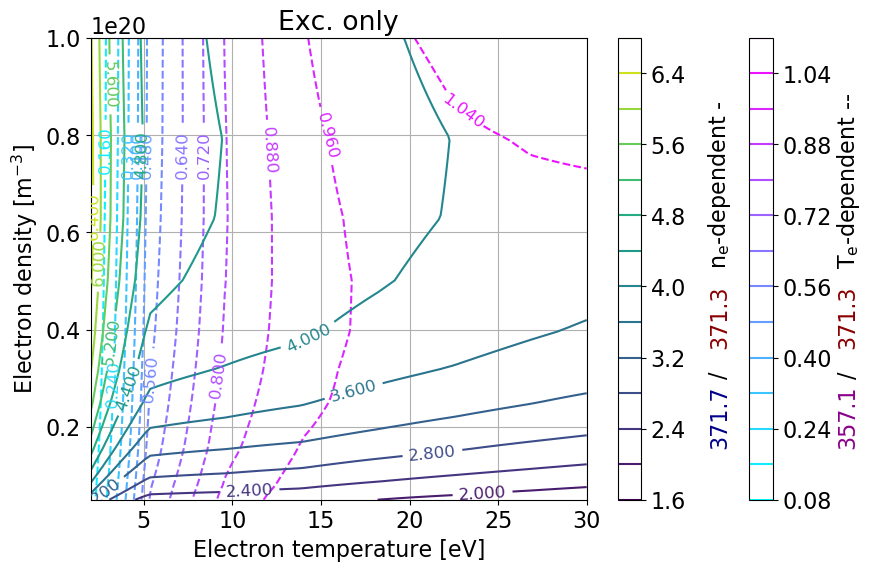

In [5]:
importlib.reload(atomic_data)
title = "Exc. only"
use_fractional_abundance = False
use_recom = False
ne_range = [5e18,1e20]
Te_range = [2,30]
ne_scale = "linear"
#ne_scale = "log"
comment="extended_temperature"
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_neon_active"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="ne", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


### Passive neon

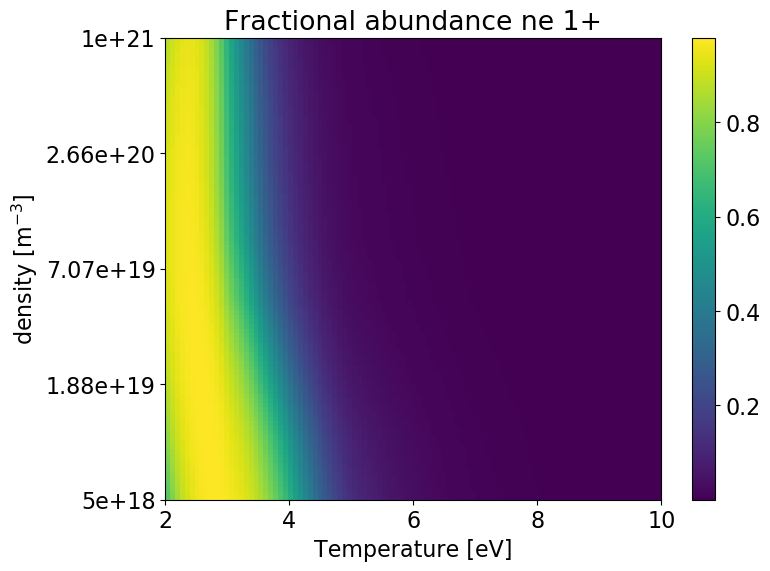

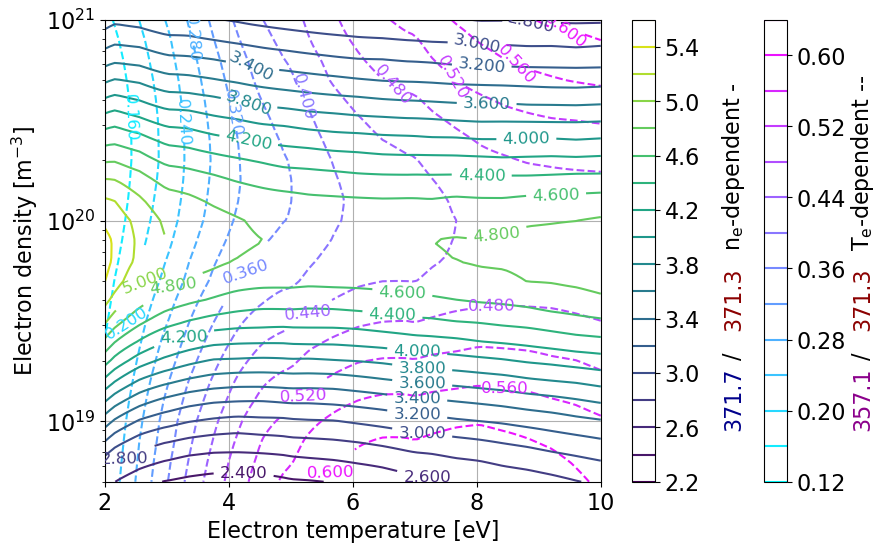

In [6]:
importlib.reload(atomic_data)
title = "Exc. and Rec."
title = None
use_fractional_abundance = True
use_recom = True
ne_range = [5e18,1e21]
Te_range = [2,10]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_neon"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="ne", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


### Active nitrogen

In [7]:
importlib.reload(atomic_data)
title = "Exc. only"
#title = None
use_fractional_abundance = False
use_recom = False
ne_range = [1e19,1e21]
Te_range = [1,10]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_nitrogen_active"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="n", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


### Passive nitrogen

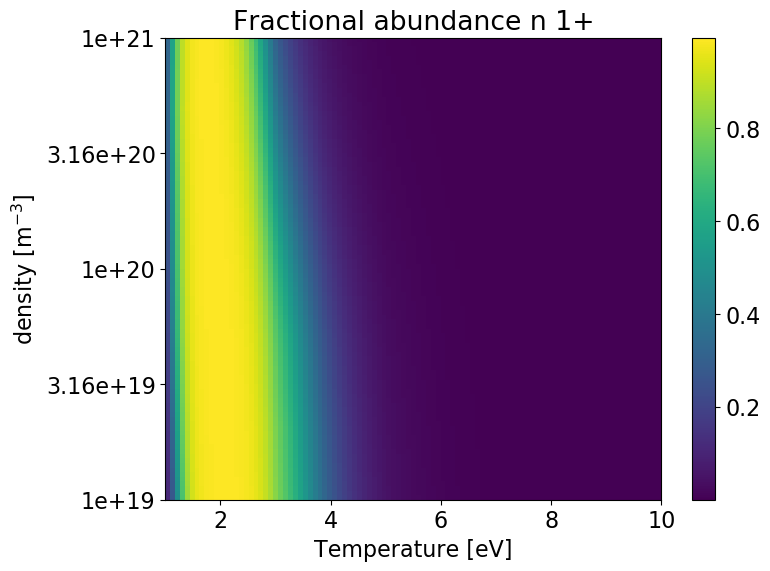

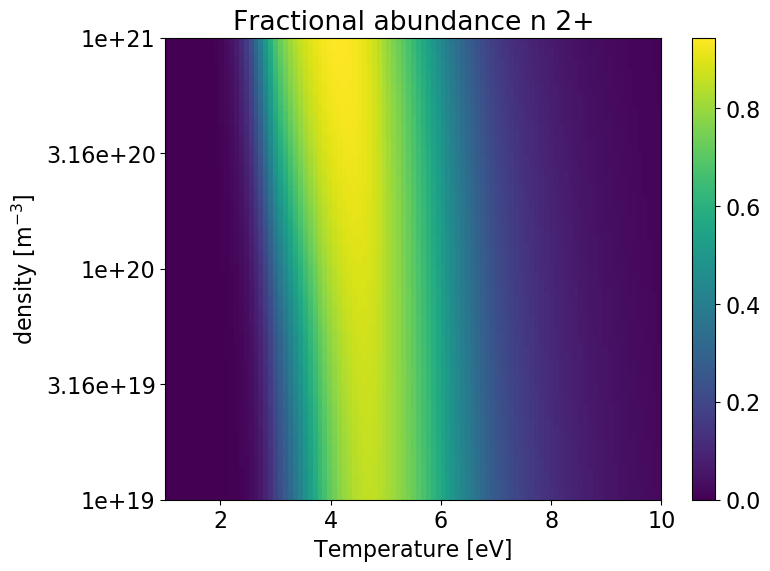

In [8]:
importlib.reload(atomic_data)
title = "Exc. and Rec."
title = None
use_fractional_abundance = True
use_recom = True
ne_range = [1e19,1e21]
Te_range = [1,10]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_nitrogen"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="n", ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


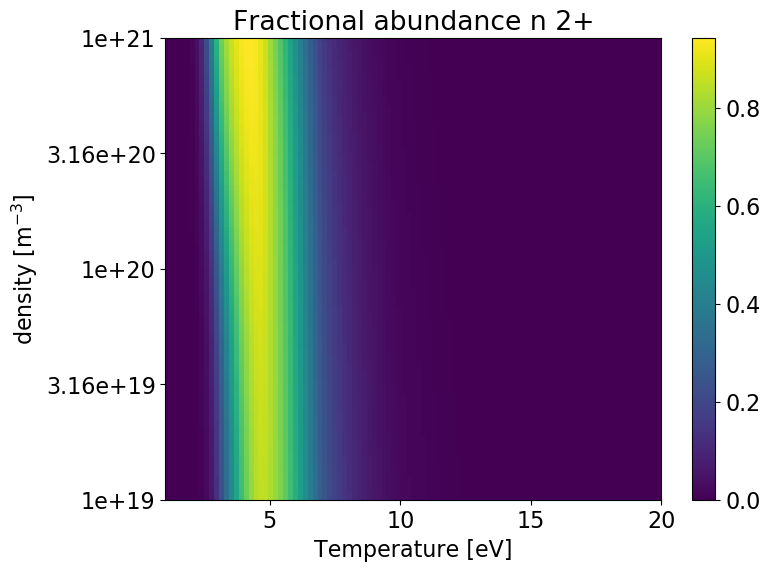

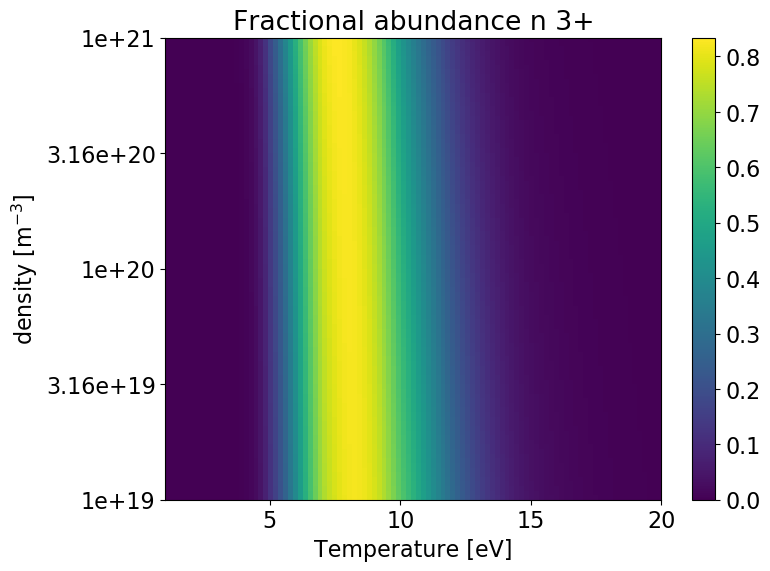

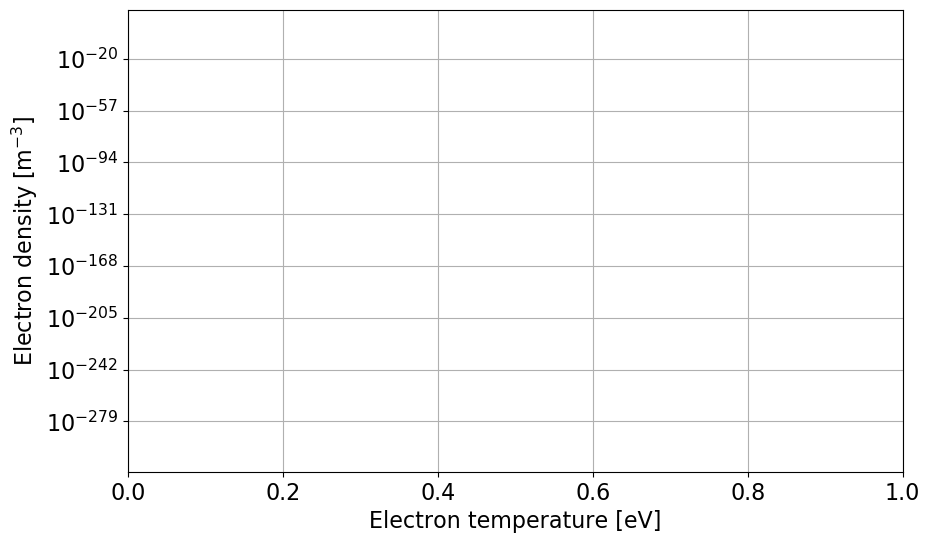

In [10]:
importlib.reload(atomic_data)
title = "Exc. and Rec."
title = None
use_fractional_abundance = True
use_recom = True
ne_range = [1e19,1e21]
Te_range = [1,20]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_nitrogen"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="n",ion=2, ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


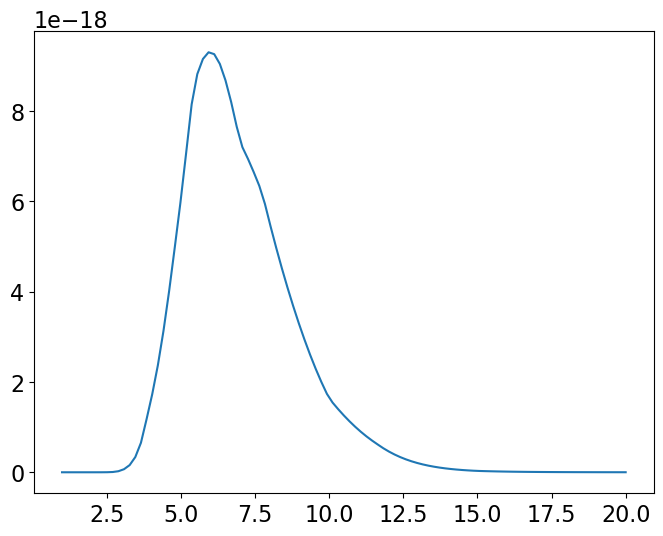

In [13]:
n = 5e19
n_idx = utils.val2idx(ne_array,n)
plt.figure(figsize=(8,6))
plt.plot(Te_array,line_intensities[0,n_idx])
plt.show()

### CII passive:

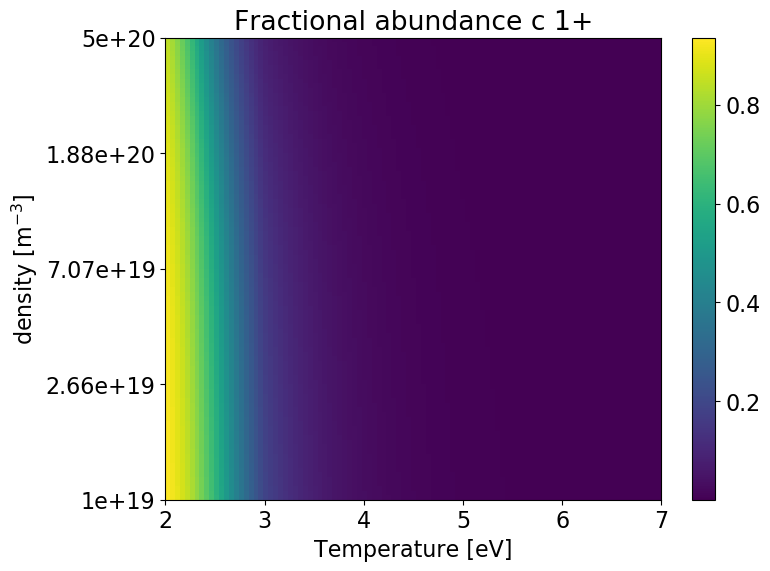

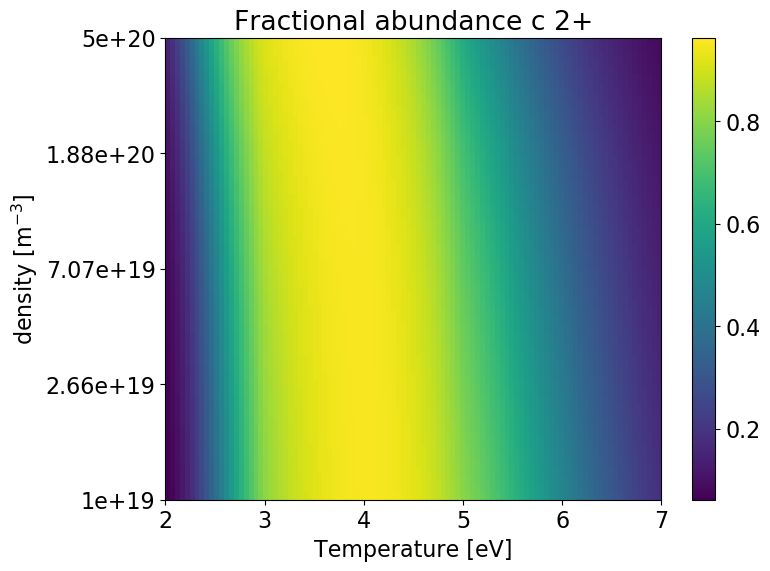

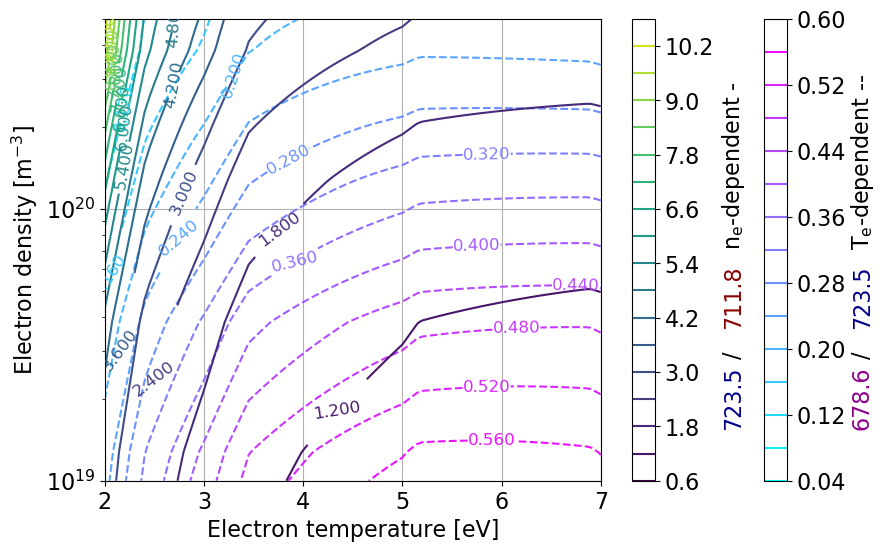

In [19]:
importlib.reload(atomic_data)
title = "Exc. and Rec."
title = None
use_fractional_abundance = True
use_recom = True
ne_range = [1e19,0.5e21]
Te_range = [2,7]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
save_path = "//share.ipp-hgw.mpg.de/documents/frhe/Documents/phd/Reports/thesis/Weekly_meetings/05_radiation_dynamics/tapete_carbon"
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="c",ion=1, ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)


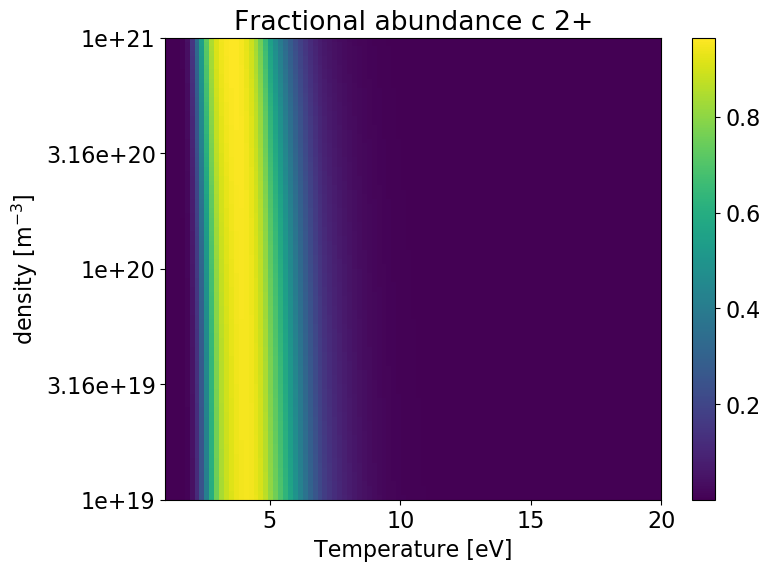

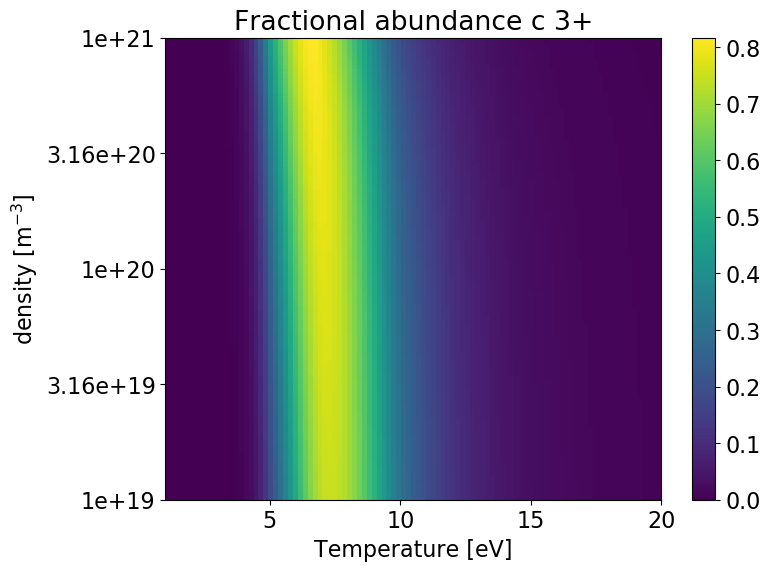

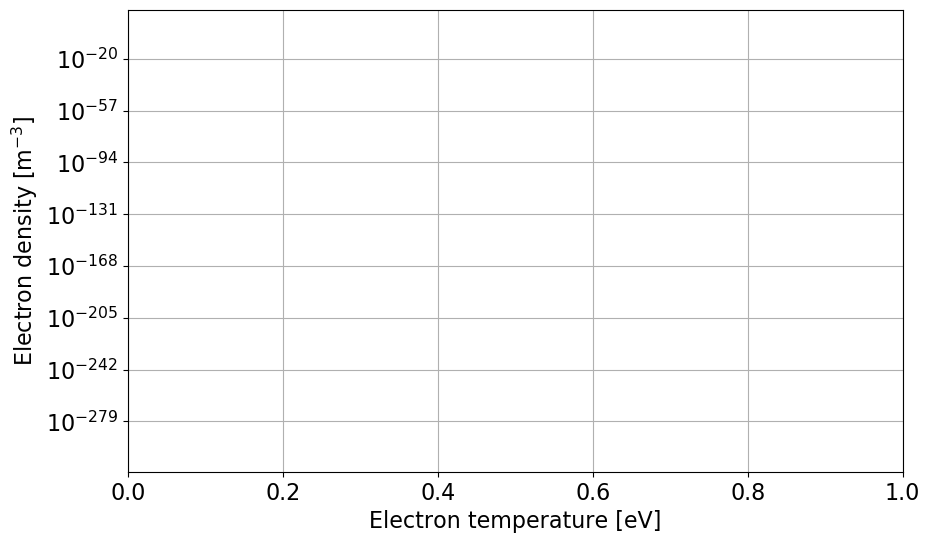

In [20]:
importlib.reload(atomic_data)
title = "Exc. and Rec."
title = None
use_fractional_abundance = True
use_recom = True
ne_range = [1e19,1e21]
Te_range = [1,20]
ne_scale = "linear"
ne_scale = "log"
comment="extended_temperature"
comment = None
debug = True
None
ne_array, Te_array, frac, pecs, line_intensities = atomic_data.get_line_intensities(element="c",ion=2, ne_range=ne_range, Te_range=Te_range,use_recom=use_recom, use_fractional_abundance=use_fractional_abundance, ne_scale=ne_scale,title=title, debug=debug,comment=comment,save_path=save_path)
